## Creating multiple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

### Input data

In [11]:
data = pd.read_csv('houses.txt', header = None, names=['Size (sqft)','Number of Bedrooms','Number of floors','Age of Home','Price (1000s dollars)'])
data

,Size (sqft),Number of Bedrooms,Number of floors,Age of Home,Price (1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [29]:
y_train = data['Price (1000s dollars)']

In [30]:
X_train = data[['Size (sqft)','Number of Bedrooms','Number of floors','Age of Home']]

In [31]:
X_features = ['size(sqft)','bedrooms','floors','age']

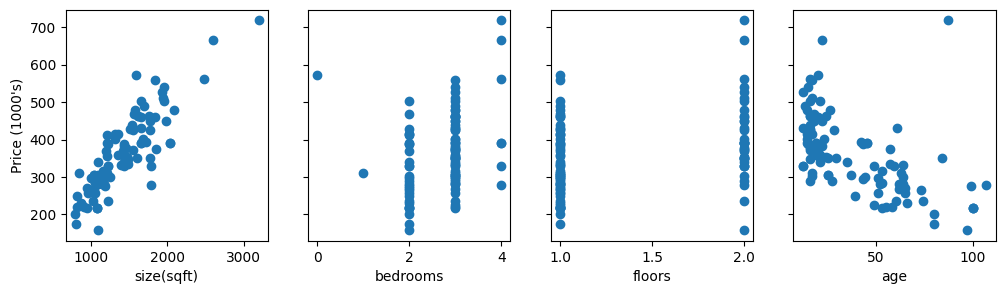

In [36]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train.iloc[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [37]:
def normalize(x):

    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)

    x_norm = (x - mu) / sigma

    return x_norm

In [39]:
x_norm = normalize(X_train)

In [49]:
x_norm = x_norm.to_numpy()
y_train = y_train.to_numpy()

### Create Cost function

In [40]:
def compute_cost(x,y,w,b):
    predicted_y = np.dot(x,w) + b

    total_cost = 0
    for i in range(len(x)):

        error_i = predicted_y[i] - y[i]
        error_sq = error_i**2

        total_cost += error_sq/len(x)

    return total_cost

### Create Gradient Descent

In [41]:
def compute_gradient(x,y,w,b):

    predicted_y = np.dot(x,w) + b

    updated_w = 0
    updated_b = 0

    for i in range(len(x)):
        temp_w = ((predicted_y[i] - y[i]) * x[i])/ len(x)
        temp_b = (predicted_y[i] - y[i]) / len(x)

        updated_w += temp_w
        updated_b += temp_b

    return updated_w, updated_b

In [42]:
def compute_gradient(x,y,w,b):

    predicted_y = np.dot(x,w) + b

    gradient_w = np.zeros(len(x[0]))
    gradient_b = 0

    for i in range(len(x)):

        for j in range(len(x[i])):
            temp_w = ((predicted_y[i] - y[i])*x[i][j])/len(x)
            gradient_w[j] += temp_w

        temp_b = (predicted_y[i] - y[i])/len(x)
        gradient_b += temp_b

    return gradient_w, gradient_b


### Result

In [55]:
w = np.zeros(len(x_norm[0]))
b = 0

alpha = 1.0e-9

thresh = 100000

count = 0

cost_journey = []
w_journey = []
b_journey = []

while True:
    temp_cost = compute_cost(x_norm,y_train,w,b)

    cost_journey.append(temp_cost)
    w_journey.append(w)
    b_journey.append(b)

    if temp_cost < 1:
        print(f'Iteration number : {count}')
        print(f'Cost function result: {temp_cost}')
        print(f'Weight: {w}')
        print(f'Bias: {b}')
        break

    grad_w, grad_b = compute_gradient(x_norm,y_train,w,b)

    w = w - alpha * grad_w

    b = b - alpha * grad_b 

    if count > thresh:
        print(f'Iteration number : {count}')
        print(f'Cost function result: {temp_cost}')
        print(f'Weight: {w}')
        print(f'Bias: {b}')
        break

    count += 1       

Iteration number : 10001
Cost function result: 142045.2883283984
Weight: [ 0.00089176  0.00030197  0.00033281 -0.00059944]
Bias: 0.0036231015616904373


In [56]:
for i in range(len(x_norm)):
    print(f"prediction: {np.dot(x_norm[i], w) + b:0.2f}, target value: {y_train[i]}")

prediction: 0.00, target value: 271.5
prediction: 0.00, target value: 300.0
prediction: 0.01, target value: 509.8
prediction: 0.00, target value: 394.0
prediction: 0.01, target value: 540.0
prediction: 0.00, target value: 415.0
prediction: 0.00, target value: 230.0
prediction: 0.00, target value: 560.0
prediction: 0.00, target value: 294.0
prediction: 0.01, target value: 718.2
prediction: 0.00, target value: 200.0
prediction: 0.00, target value: 302.0
prediction: 0.00, target value: 468.0
prediction: 0.00, target value: 374.2
prediction: 0.00, target value: 388.0
prediction: 0.00, target value: 282.0
prediction: 0.00, target value: 311.8
prediction: 0.01, target value: 401.0
prediction: 0.01, target value: 449.8
prediction: 0.00, target value: 301.0
prediction: 0.00, target value: 502.0
prediction: 0.00, target value: 340.0
prediction: 0.00, target value: 400.282
prediction: 0.00, target value: 572.0
prediction: 0.00, target value: 264.0
prediction: 0.00, target value: 304.0
prediction

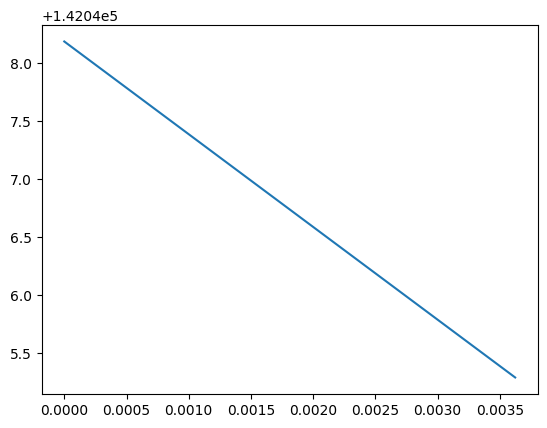

In [57]:
plt.plot(b_journey,cost_journey)

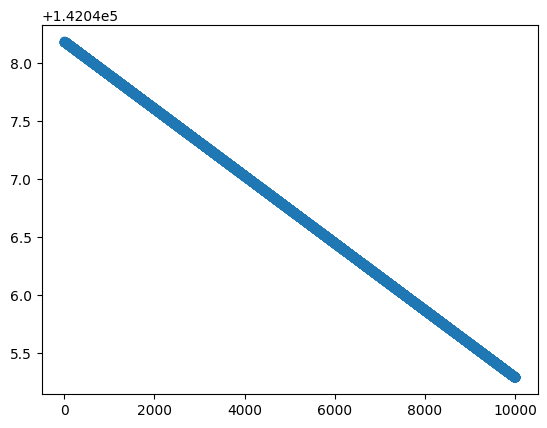

In [59]:
plt.scatter(range(len(cost_journey)),cost_journey)

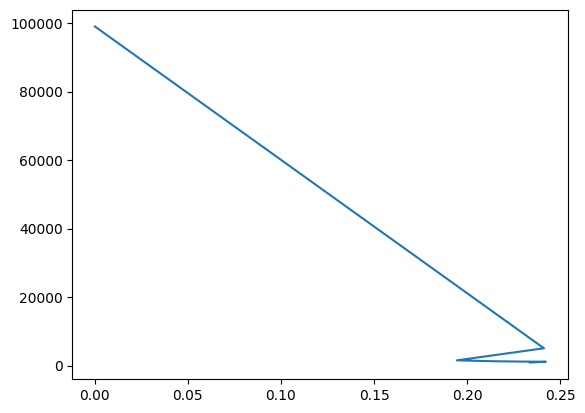

In [ ]:
plt.plot([x[0] for x in w_journey],cost_journey)

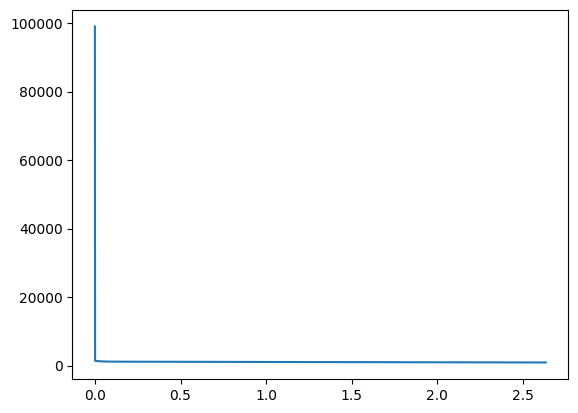

In [ ]:
plt.plot([x[1] for x in w_journey],cost_journey)

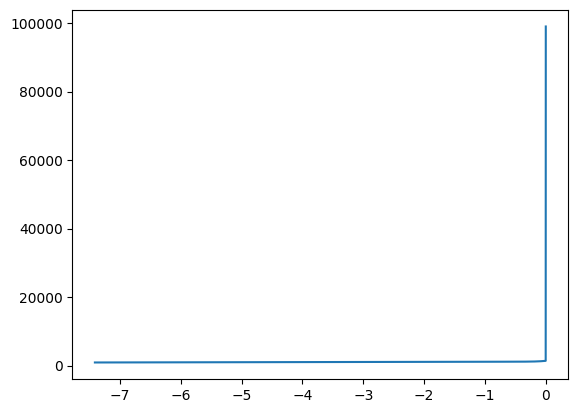

In [ ]:
plt.plot([x[2] for x in w_journey],cost_journey)

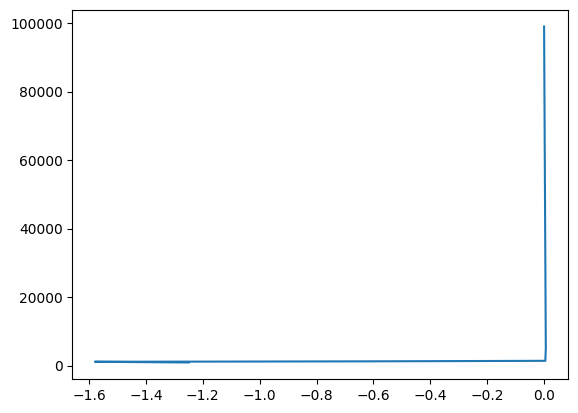

In [ ]:
plt.plot([x[3] for x in w_journey],cost_journey)